# Graph Visualization Notebook
This notebook is used to visualize the graph instances, and to test reading graph instances from the files.

In [3]:
import os
import sys
current_directory = os.getcwd().replace('notebooks', '')
sys.path.append(current_directory)

from matplotlib import pyplot as plt
import networkx as nx

from utils.graph_plotter import plot_graph
from utils.graph_reader import read_graph_instance, read_rakaj_graph_instance
from main.greedy_algorithm import greedy_mwds, greedy_mwdds
from main.ilp_model import ilp_mwdds

import warnings
warnings.filterwarnings('ignore')

In [4]:
dim_path = "../instances/test_instances/"
instances = os.listdir(os.path.abspath(dim_path))

In [5]:
def plot_graph_grid(vertices_w: dict, edges: list, dominating_set: set, instance_info: str, digraph: bool = False, ax=None):
    if ax is None:
        plt.figure(figsize=(10, 8))
    else:
        plt.sca(ax)

    if digraph:
        graph = nx.DiGraph(edges)
        edges_options = {"arrows": True, "arrowstyle": "->", "arrowsize": 15, "node_size": 1500}
    else:
        graph = nx.Graph(edges)
        edges_options = {"arrows": True, "node_size": 1500}

    pos = nx.nx_pydot.graphviz_layout(graph, prog="neato")
    color_map = []

    for node in graph.nodes:
        if not dominating_set:
            color_map.append('blue')
        else:
            if node in dominating_set:
                color_map.append('red')
            else:
                color_map.append('blue')

        graph.nodes[node]["weight"] = vertices_w[node]

    nodes_options = {"edgecolors": "tab:gray", "node_size": 1500, "alpha": 0.8}
    nx.draw_networkx_nodes(graph, pos, node_color=color_map, **nodes_options)
    nx.draw_networkx_edges(graph, pos, edgelist=edges, width=2, **edges_options)

    labels = {
        n: str(n) + '\nw' + str(graph.nodes[n]['weight'])
        for n in graph.nodes
    }
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=14, font_color='white')


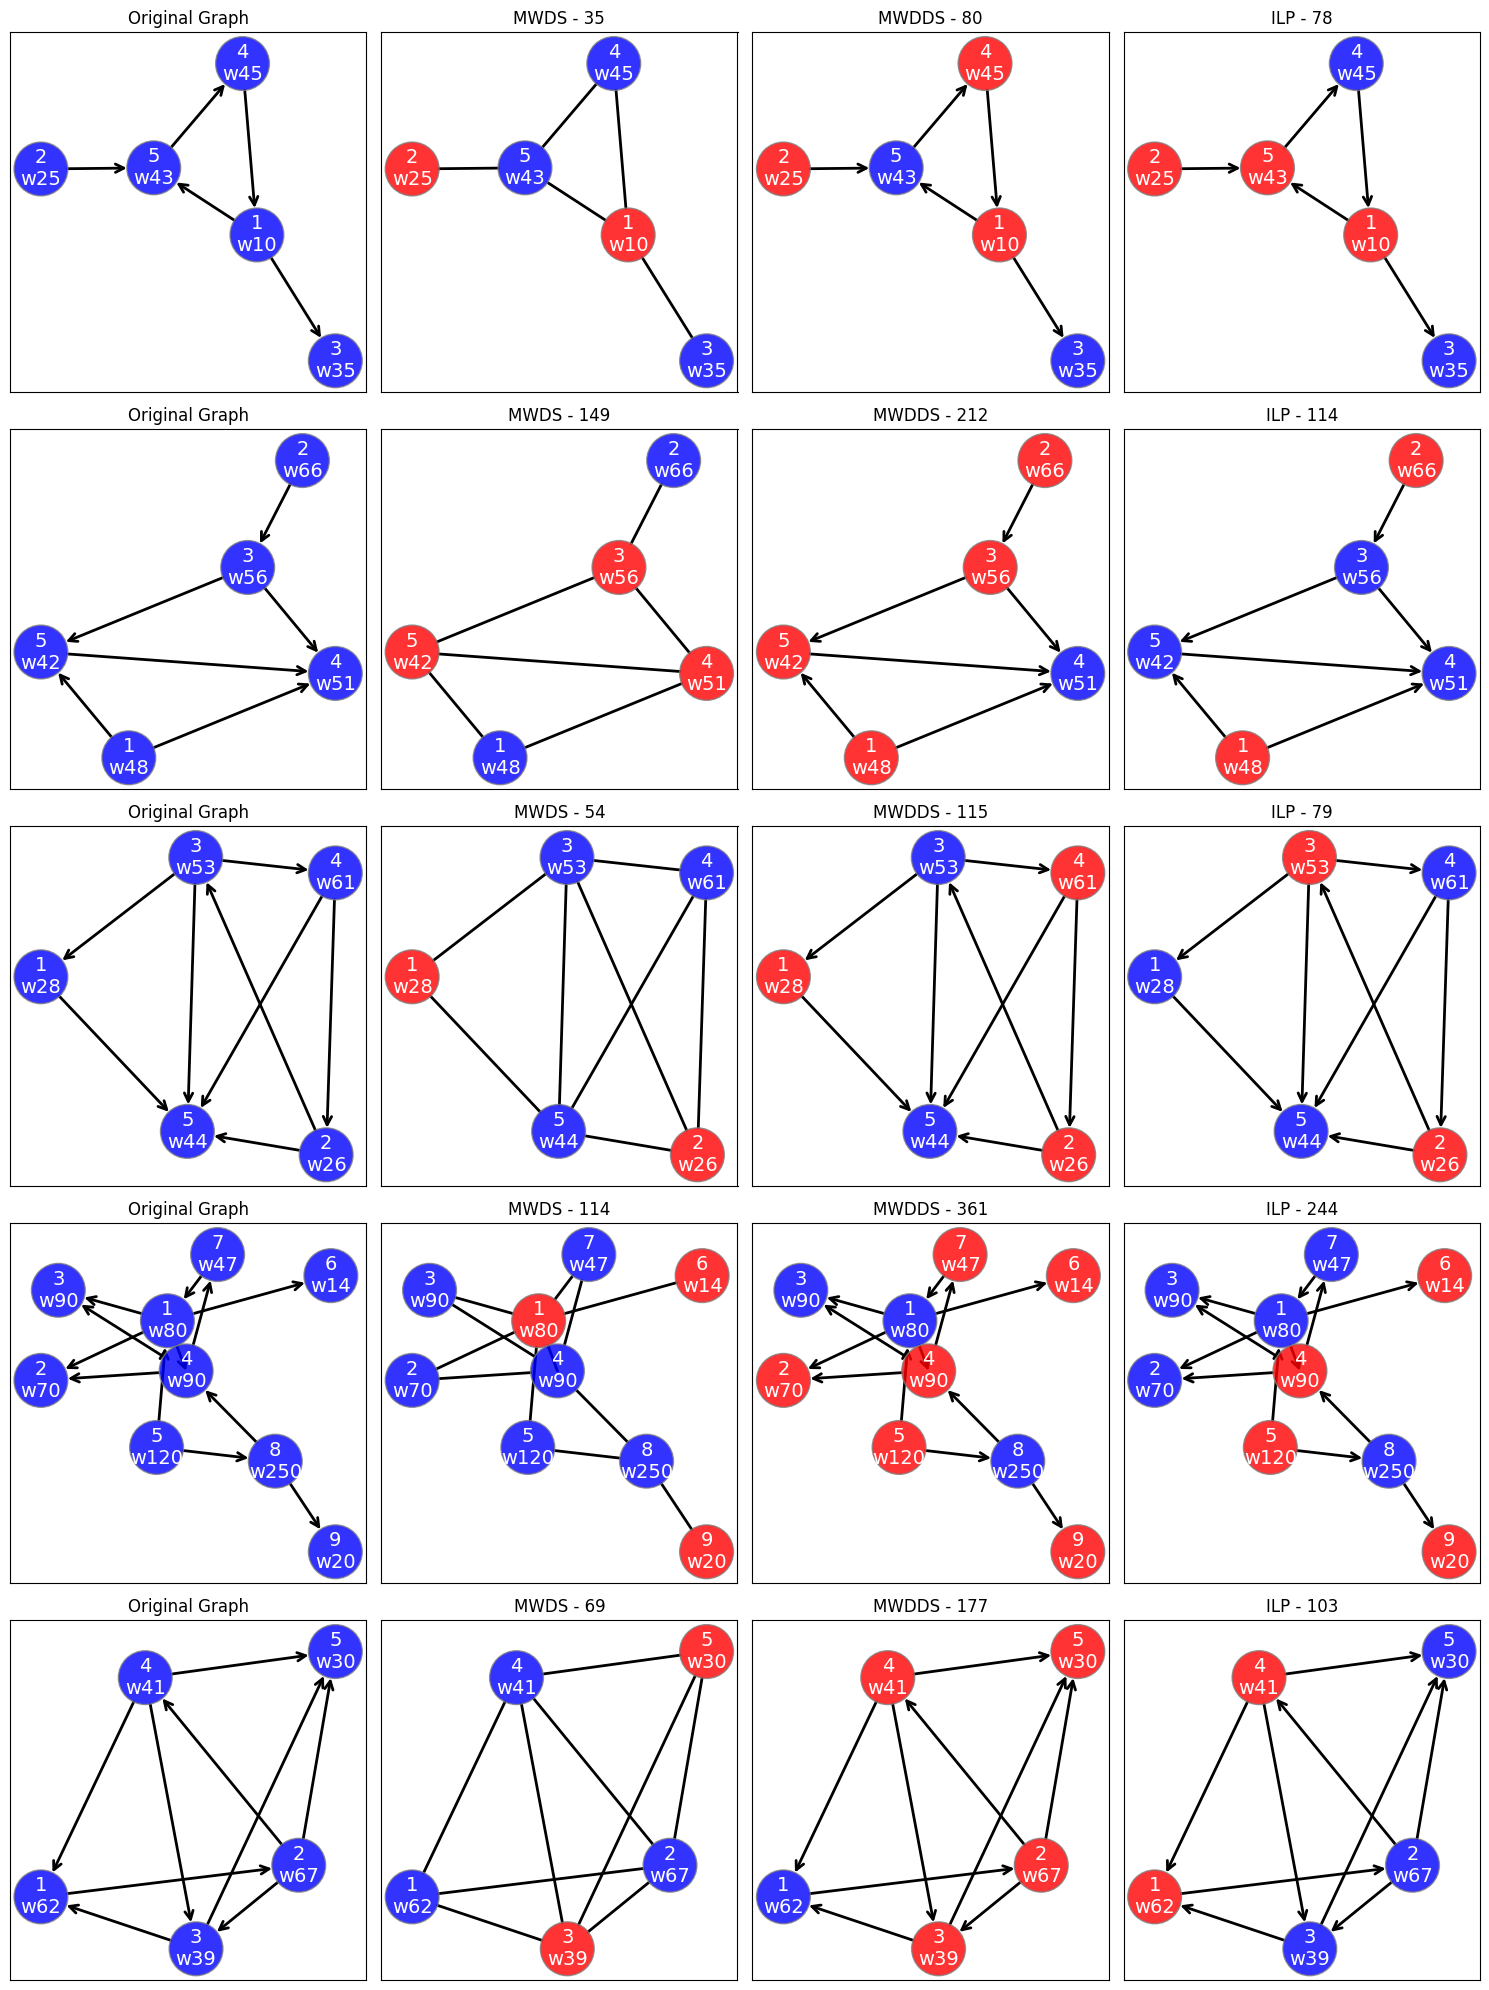

In [7]:
num_rows = len(instances)
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

for i, instance in enumerate(instances):
    instance_path = os.path.join(dim_path, instance)
    graph_v, graph_e = read_graph_instance(instance_path)

    axs[i, 0].set_title("Original Graph")
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=None, instance_info=None, digraph=True, ax=axs[i, 0])

    # Plot the minimum weight dominating set
    ds, ds_w = greedy_mwds(graph_v, graph_e)
    axs[i, 1].set_title("MWDS - " + str(ds_w))
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=ds, instance_info=None, digraph=False, ax=axs[i, 1])

    # Plot the minimum weight directed dominating set
    ds, ds_w = greedy_mwdds(graph_v, graph_e)
    axs[i, 2].set_title("MWDDS - " + str(ds_w))
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=ds, instance_info=None, digraph=True, ax=axs[i, 2])

    # Plot ILP solver solution
    ds, ds_w = ilp_mwdds(graph_v, graph_e)
    axs[i, 3].set_title("ILP - " + str(ds_w))
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=ds, instance_info=None, digraph=True, ax=axs[i, 3])

plt.tight_layout()
plt.show()  
# plt.savefig("test.png")

### Rakaj instances - testing function for reading data from file

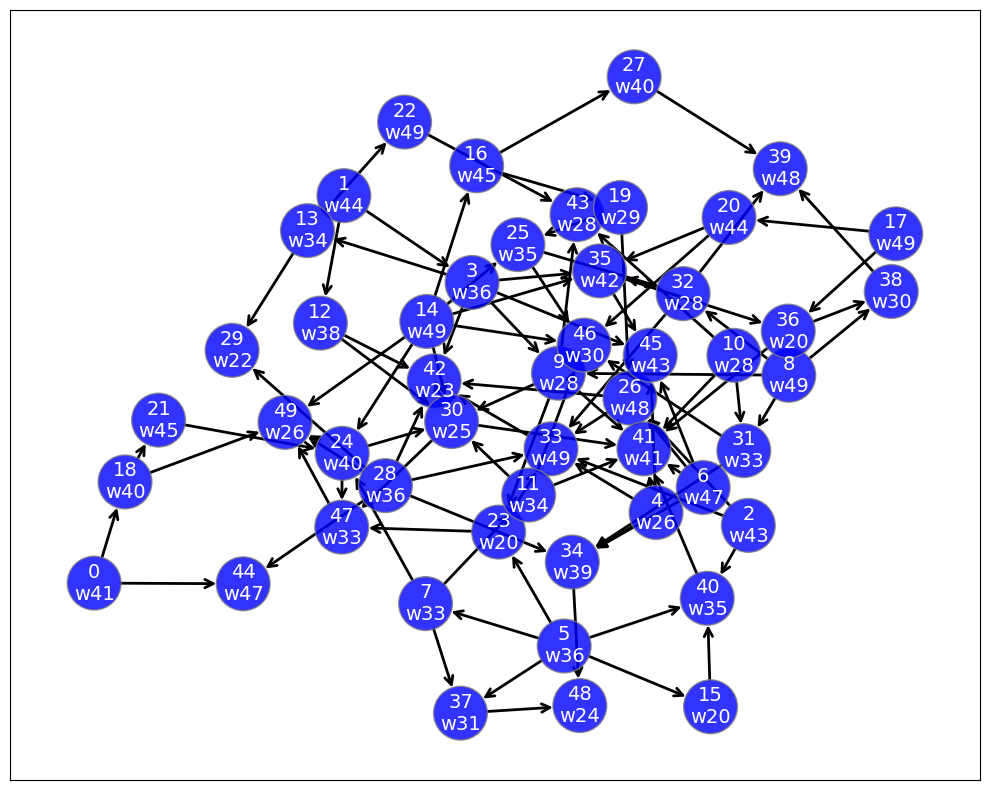

MWDS solution:  {3, 4, 6, 7, 9, 10, 14, 15, 18, 19, 23, 24, 27, 28, 29, 30, 31, 32, 35, 36, 38, 40, 42, 43, 46, 48, 49} 838


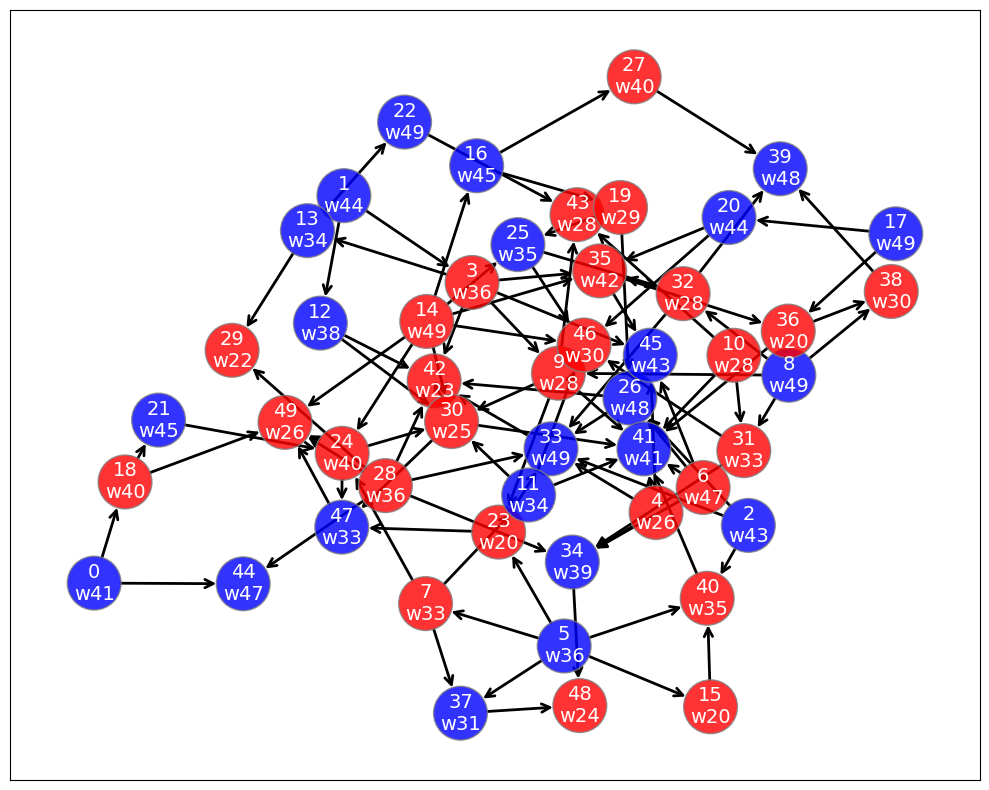

MWDDS solution:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 27, 28, 29, 30, 32, 36, 37, 42, 46, 48, 49} 1084


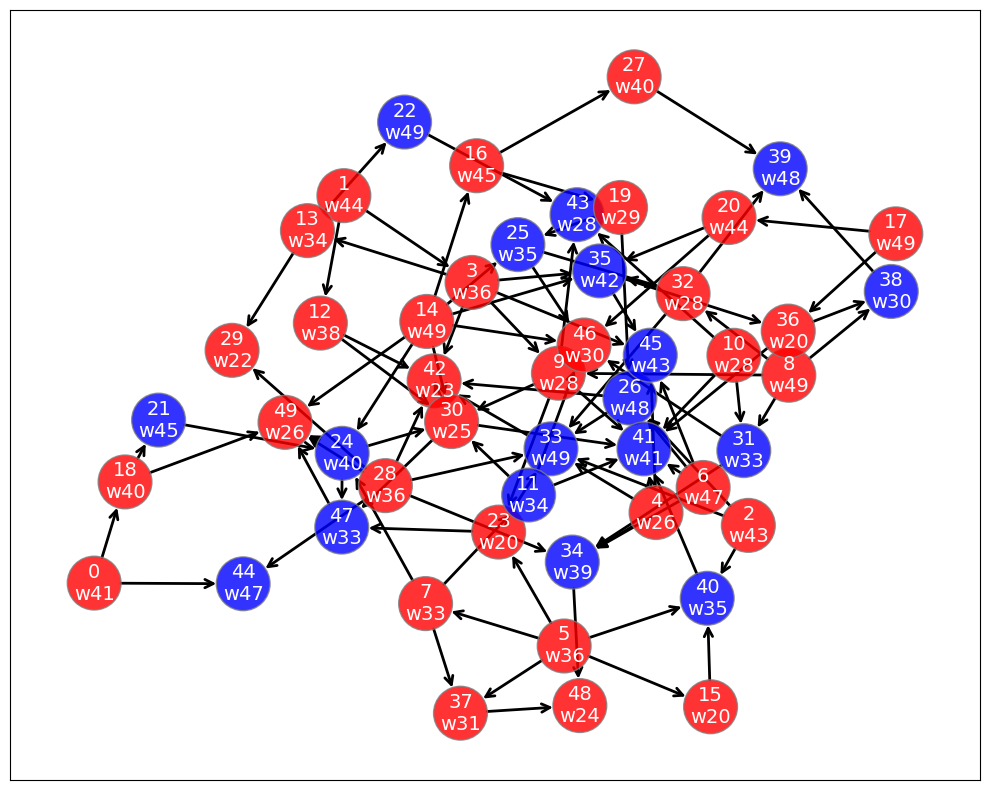

ILP solution:  {0, 1, 2, 4, 5, 6, 7, 8, 10, 13, 14, 48, 17, 18, 19, 23, 27, 28} 668


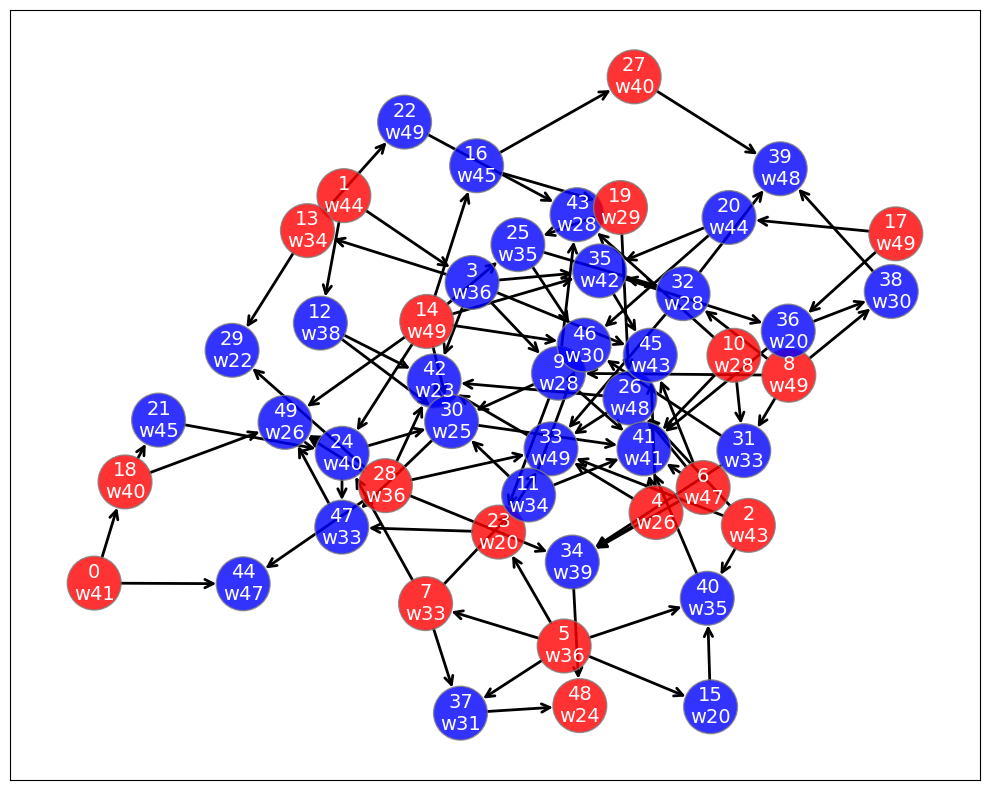

In [13]:
graph_v, graph_e = read_rakaj_graph_instance("../instances/rakaj1/Problem.dat_50_100_0")
plot_graph(vertices_w=graph_v, edges=graph_e, dominating_set=None, instance_info="", digraph=True)

ds, ds_w = greedy_mwds(graph_v, graph_e)
print("MWDS solution: ", ds, ds_w)
plot_graph(vertices_w=graph_v, edges=graph_e, dominating_set=ds, instance_info="", digraph=True)

ds, ds_w = greedy_mwdds(graph_v, graph_e)
print("MWDDS solution: ", ds, ds_w)
plot_graph(vertices_w=graph_v, edges=graph_e, dominating_set=ds, instance_info="", digraph=True)

ds, ds_w = ilp_solver(graph_v, graph_e)
print("ILP solution: ", ds, ds_w)
plot_graph(vertices_w=graph_v, edges=graph_e, dominating_set=ds, instance_info="", digraph=True)